In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C://Users//USER//Documents//netflix_data.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.shape

(6234, 12)

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
# Data Exploration
# Basic statistics
df.describe()

,show_id,release_year
count,3.774000e+03,3774.000000
mean,7.510908e+07,2012.087440
std,1.341114e+07,9.566944
min,2.477470e+05,1942.000000
25%,7.027581e+07,2011.000000
50%,8.014732e+07,2016.000000
75%,8.024067e+07,2017.000000
max,8.123573e+07,2020.000000


In [9]:
# More detailed exploration
print(df['type'].value_counts())
print(df['country'].value_counts())


Movie      3678
TV Show      96
Name: type, dtype: int64
United States                  1323
India                           707
United Kingdom                  152
Canada                           78
Spain                            72
                               ... 
South Korea, Czech Republic       1
Spain, France, Uruguay            1
Chile, Argentina                  1
Czech Republic, Slovakia          1
United Kingdom, Russia            1
Name: country, Length: 433, dtype: int64


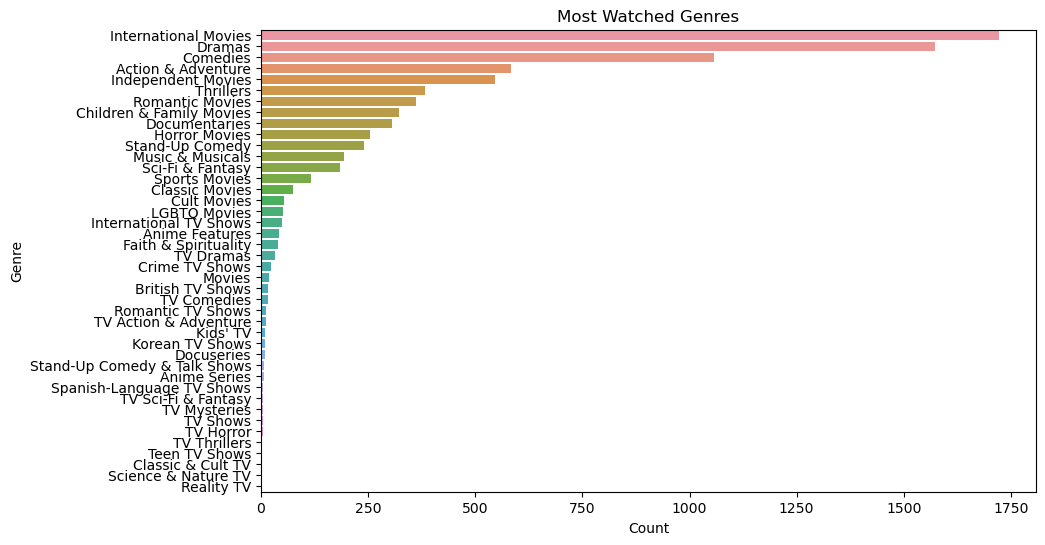

In [11]:
# Split the 'listed_in' column into separate genres
df['genres'] = df['listed_in'].str.split(', ')

# Explode the list into separate rows
genres_exploded = df.explode('genres')

# Plotting the most watched genres
plt.figure(figsize=(10,6))
sns.countplot(y=genres_exploded['genres'], order=genres_exploded['genres'].value_counts().index)
plt.title('Most Watched Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


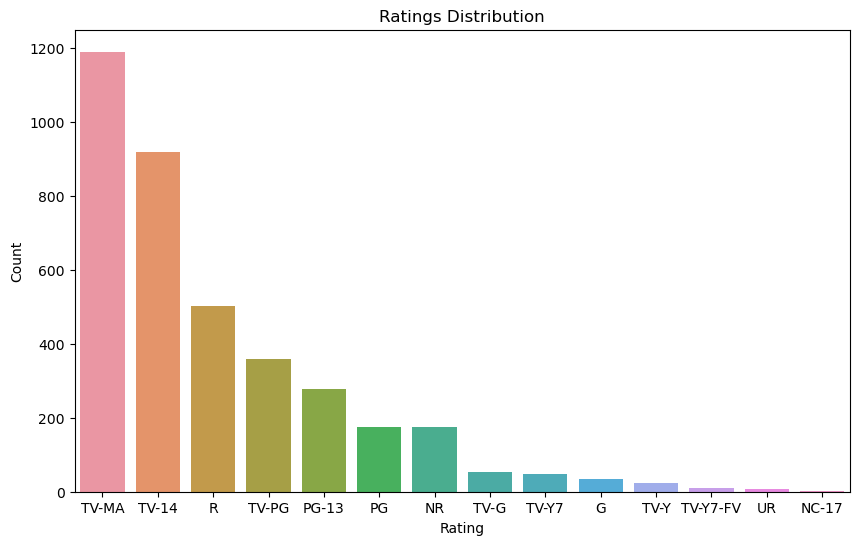

In [12]:
# Ratings Distribution:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
